<a href="https://colab.research.google.com/github/Gopalchalak/Deep-Learning-Mini-Project/blob/main/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [56]:
x, y =make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

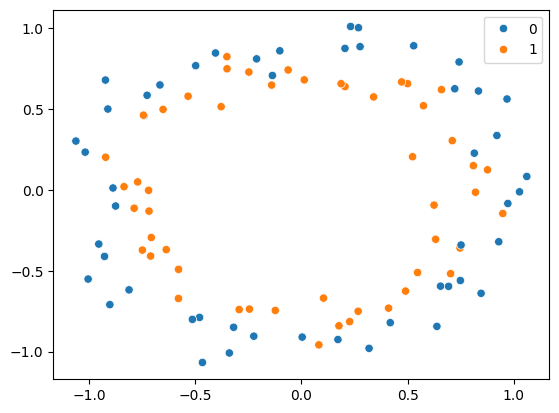

In [55]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=2)

In [36]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 1000, verbose=0)

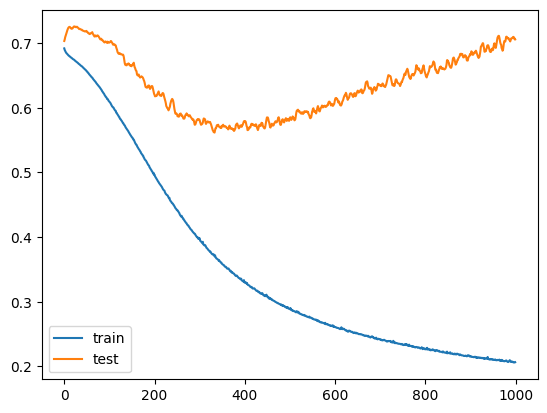

In [39]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


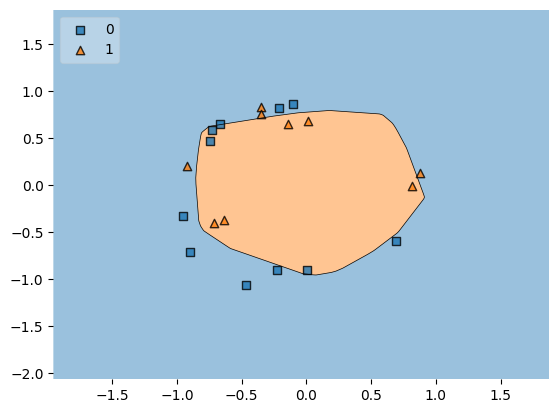

In [40]:
plot_decision_regions(x_test, y_test.ravel(), clf=model, legend=2)
plt.show()

Early Stopping

In [77]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
callback = EarlyStopping(monitor='accuracy',
                         patience=10,
                         min_delta=0.00001,
                         verbose=1,
                         mode='auto',
                         baseline=None,
                         restore_best_weights=False)

In [80]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.4906 - loss: 0.7003 - val_accuracy: 0.5000 - val_loss: 0.7040
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4688 - loss: 0.6959 - val_accuracy: 0.4500 - val_loss: 0.7054
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5070 - loss: 0.6934 - val_accuracy: 0.3500 - val_loss: 0.7081
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5250 - loss: 0.6938 - val_accuracy: 0.3500 - val_loss: 0.7096
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5586 - loss: 0.6894 - val_accuracy: 0.3500 - val_loss: 0.7121
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5484 - loss: 0.6875 - val_accuracy: 0.3500 - val_loss: 0.7143
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5641 - loss: 0.6847 - val_accuracy: 0.3500 - val_loss: 0.7152
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5797 - loss: 0.6814 - val_accuracy: 0.3500 - 

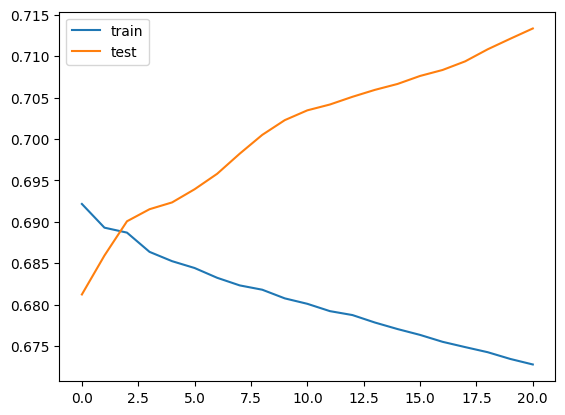

In [62]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.legend()
plt.show()